In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data= pd.read_csv('C:/Users/charl/Downloads/501.csv', index_col=0)
data.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
timestamp,,,,,,,
42:03.8,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
42:03.9,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
42:03.9,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
42:03.9,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
42:03.9,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6


In [4]:
data.isna().sum()

back_x     0
back_y     0
back_z     0
thigh_x    0
thigh_y    0
thigh_z    0
label      0
dtype: int64

In [5]:
data= data.dropna()

In [6]:

data.isna().sum()

back_x     0
back_y     0
back_z     0
thigh_x    0
thigh_y    0
thigh_z    0
label      0
dtype: int64

In [7]:
data['label'].value_counts()

1    62872
7    14562
6    14376
8     9578
3     1876
5      504
4       92
Name: label, dtype: int64

Text(0.5, 1.0, 'label')

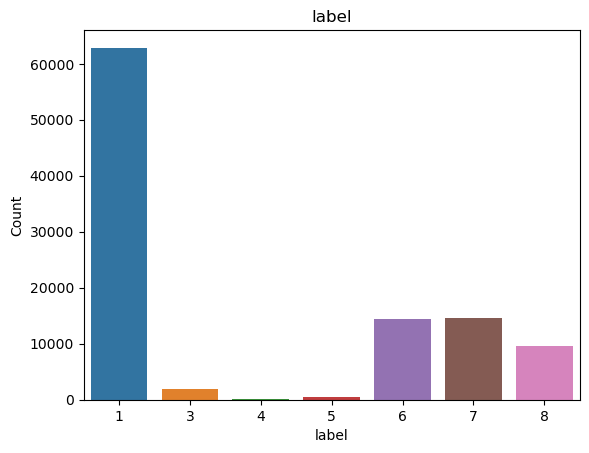

In [8]:
sns.countplot(data = data, x="label")
plt.xlabel("label")
plt.ylabel("Count")
plt.title("label")

In [9]:
data=data.sample(frac=0.05) 
#5%의 임의 추출

In [11]:
data.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
timestamp,,,,,,,
49:48.1,-0.140625,-0.015625,0.906250,-0.142334,-0.125000,-1.078125,8
01:57.3,-1.481689,-0.287598,-0.440918,-1.703613,-0.150391,-0.149414,1
16:10.9,-0.765625,-0.062500,0.562500,-0.204834,-0.200439,-1.064209,7
09:32.0,-0.937012,0.171875,-0.201660,-0.950928,0.028564,-0.042480,1
48:01.7,-0.138184,-0.015625,0.919922,-0.137207,-0.140625,-1.078125,8


In [21]:
#Splitting the data into training and test test
X = data.iloc[:,1:7].values
#data 1부터 6열까지 가져와서 X변수에 저장
y = data.iloc[:,6].values
#data의  6열 값을 가져와 y의 변수에 저장

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [23]:
X

array([[-1.562500e-02,  9.062500e-01, -1.423340e-01, -1.250000e-01,
        -1.078125e+00,  8.000000e+00],
       [-2.875980e-01, -4.409180e-01, -1.703613e+00, -1.503910e-01,
        -1.494140e-01,  1.000000e+00],
       [-6.250000e-02,  5.625000e-01, -2.048340e-01, -2.004390e-01,
        -1.064209e+00,  7.000000e+00],
       ...,
       [-1.406250e-01, -4.687500e-02, -9.687500e-01,  5.615000e-03,
        -1.562500e-02,  6.000000e+00],
       [-1.372070e-01, -2.490230e-01, -6.845700e-01, -4.492200e-02,
        -6.206050e-01,  1.000000e+00],
       [-1.977500e-02,  1.538100e-02, -1.384280e-01, -2.734400e-02,
         3.671880e-01,  1.000000e+00]])

In [24]:
X.shape

(5193, 6)

In [19]:
Y

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [25]:
Y.shape

(5193, 7)

In [36]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(60,input_shape=(6,),activation='tanh'))
model.add(Dense(60,activation='tanh'))
model.add(Dense(40,activation='tanh'))
model.add(Dense(40,activation='tanh'))
model.add(Dense(7,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 60)                420       
                                                                 
 dense_7 (Dense)             (None, 60)                3660      
                                                                 
 dense_8 (Dense)             (None, 40)                2440      
                                                                 
 dense_9 (Dense)             (None, 40)                1640      
                                                                 
 dense_10 (Dense)            (None, 7)                 287       
                                                                 
Total params: 8,447
Trainable params: 8,447
Non-trainable params: 0
_________________________________________________________________


C:\Users\charl\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [37]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.3839 - accuracy: 0.8606 - val_loss: 0.2725 - val_accuracy: 0.8566
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.2378 - accuracy: 0.8758 - val_loss: 0.1882 - val_accuracy: 0.8970
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 0.2344 - accuracy: 0.8746 - val_loss: 0.1870 - val_accuracy: 0.8970
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 0.2340 - accuracy: 0.8799 - val_loss: 0.3178 - val_accuracy: 0.8518
Epoch 5/100
130/130 [==============================] - 0s 4ms/step - loss: 0.4583 - accuracy: 0.8310 - val_loss: 0.2887 - val_accuracy: 0.8691
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 0.3085 - accuracy: 0.8483 - val_loss: 0.3017 - val_accuracy: 0.8643
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 0.3066 - accuracy: 0.8577 - val_loss: 0.2938 - val_accuracy: 0.8287

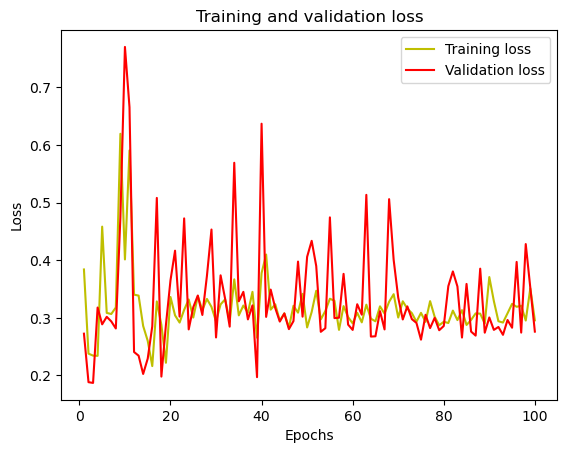

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

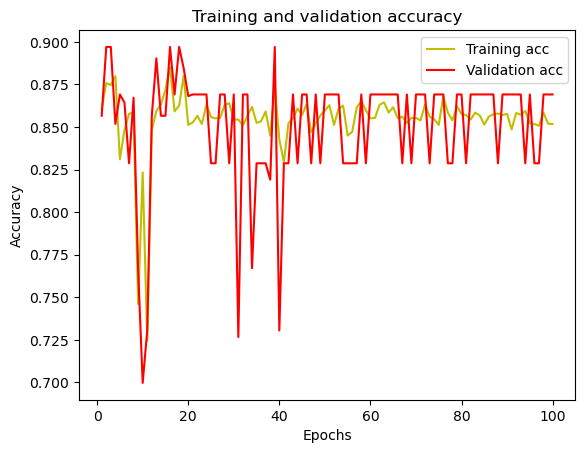

In [39]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       625
           1       0.00      0.00      0.00        29
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.80      1.00      0.89       134
           5       0.59      1.00      0.74       144
           6       0.00      0.00      0.00       102

    accuracy                           0.87      1039
   macro avg       0.34      0.43      0.38      1039
weighted avg       0.79      0.87      0.82      1039

[[625   0   0   0   0   0   0]
 [  0   0   0   0  29   0   0]
 [  0   0   0   0   1   0   0]
 [  0   0   0   0   4   0   0]
 [  0   0   0   0 134   0   0]
 [  0   0   0   0   0 144   0]
 [  0   0   0   0   0 102   0]]


C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
